In [7]:
from matplotlib.pyplot import subplots
from numpy.random import uniform
from numpy import zeros, vstack
from matplotlib.pyplot import subplots, axes


# Function: Data on a Torus

In [9]:
def make_torus_3D(n_samples=100, shuffle=True, noise=None, random_state=None,
                 factor=0.5):
    """
    Make a large torus containing a smaller torus in 3d.

    A toy dataset to visualize clustering and classification
    algorithms.
    
    Modified from make_circles
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points generated. If odd, the inner circle will
        have one point more than the outer circle.

    shuffle : bool, optional (default=True)
        Whether to shuffle the samples.

    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.

    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.

    factor : 0 < double < 1 (default=.8)
        Scale factor between inner and outer circle.

    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.

    y : array of shape [n_samples]
        The integer labels (0 or 1) for class membership of each sample.
    """
    
    from numpy import pi, linspace, cos, sin, append, ones, zeros, hstack, vstack, intp
    from sklearn.utils import check_random_state, shuffle
    
    if factor >= 1 or factor < 0:
        raise ValueError("'factor' has to be between 0 and 1.")

    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    co, ao, ci, ai = 3, 1, 5, 0.3
    generator = check_random_state(random_state)
    
    mod_freq = 31
    
    # to not have the first point = last point, we set endpoint=False
    linspace_out = linspace(0, 2 * pi, n_samples_out, endpoint=False)
    linspace_in  = linspace(0, 2 * pi, n_samples_in,  endpoint=False)
    outer_circ_x = (co+ao*cos(linspace_out)) * cos(linspace_out*mod_freq)
    outer_circ_y = (co+ao*cos(linspace_out)) * sin(linspace_out*mod_freq)
    outer_circ_z =    ao*sin(linspace_out)
    
    inner_circ_x = (ci+ai*cos(linspace_in)) * cos(linspace_in*mod_freq) * factor
    inner_circ_y = (ci+ai*cos(linspace_in)) * sin(linspace_in*mod_freq) * factor
    inner_circ_z =    ai*sin(linspace_in) * factor

    X = vstack([append(outer_circ_x, inner_circ_x),
                append(outer_circ_y, inner_circ_y),
                append(outer_circ_z, inner_circ_z)]).T
            
    y = hstack([zeros(n_samples_out, dtype=intp),
                   ones(n_samples_in, dtype=intp)])
    
    
    if shuffle:
        X, y = shuffle(X, y, random_state=generator)

    if noise is not None:
        X += generator.normal(scale=noise, size=X.shape)

    return X, y


# Call Function

(5000, 3) 5000


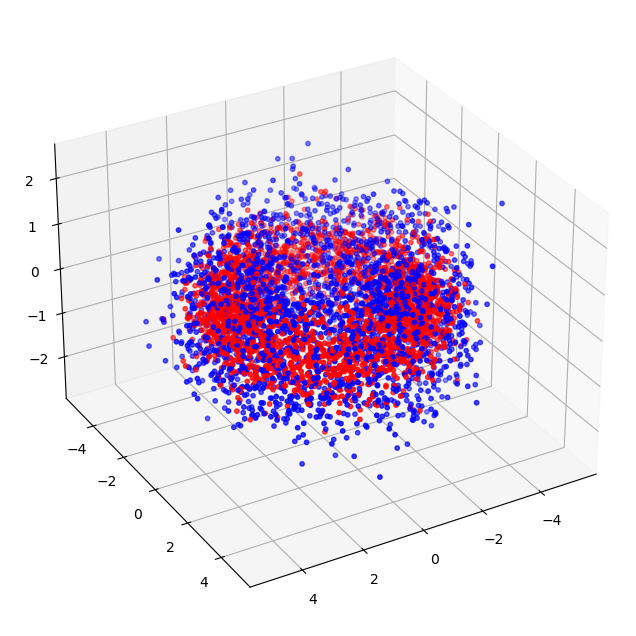

In [19]:
X, y = make_torus_3D(n_samples=5000, factor=0.6, noise=0.5)

fig, ax = subplots(figsize=(8, 8))

ax.set_visible(False)

ax = axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], marker='o', s=10, c=y, cmap='bwr');

ax.view_init(30, 60);

print(X.shape, y.size)

# Get Source of Function

In [5]:
import inspect

function_source = inspect.getsource(make_circles)

print(function_source)

def make_circles(
    n_samples=100, *, shuffle=True, noise=None, random_state=None, factor=0.8
):
    """Make a large circle containing a smaller circle in 2d.

    A simple toy dataset to visualize clustering and classification
    algorithms.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int or tuple of shape (2,), dtype=int, default=100
        If int, it is the total number of points generated.
        For odd numbers, the inner circle will have one point more than the
        outer circle.
        If two-element tuple, number of points in outer circle and inner
        circle.

        .. versionchanged:: 0.23
           Added two-element tuple.

    shuffle : bool, default=True
        Whether to shuffle the samples.

    noise : float, default=None
        Standard deviation of Gaussian noise added to the data.

    random_state : int, RandomState instance or None, default=None
        Determines random number genera

In [4]:
from sklearn.datasets import make_circles
